# **<center>A Project on Food Price Prediction</center>**

<img src="https://raw.githubusercontent.com/benard3360-star/new/main/to_use.jpg" alt="Commodity Price Analysis" width="100%" height="400px"/>



## **Introduction**
Kenya, a developing nation with a young growing population of approximately 60 million people, grapples with food insecurity challenges. These challenges are amplified by climate change, pre and post harvest challenges, rapid population growth, and refusal by the youth to actively participate in agriculture as source of income as perceived as a low-status profession (Rono et al, 2023).

Despite these challenges, the government through the relevant ministries and support partners initiatives and agritech companies such as Victory Farms and Twiga Foods are exploring leveraging new technologies such as IoT and data analytics to improve farm productivity, reduce post harvest wastage and improve supply chain efficiency (Barrett, 2021).

This project aims to develop a predictive model to enhance food affordability by:
1. Understanding how external economic factors influence Kenya’s food prices
2. Creating a machine-learning-based forecasting tool to help policymakers anticipate and mitigate price fluctuations

By conducting an empirical analysis of commodity trends and market price comparisons, the proposed models will help consumers in identify cost-saving opportunities, thus supporting Kenyans (consumers and business people) in optimizing sourcing and distribution strategies. Adopting these data-driven approaches have the potential to mitigate food insecurity, price fluctuations and advance savings among the households in Kenya (John, 2024).



#### **Data Source**

The data is sourced from the World Food Programme (WFP) Price Database which covers foods for 98 countries and in over 3,000 markets. The dataset contains price information collected weekly for Kenya and includes over 20 commodities across various Kenyan markets from 2006 till date. Data is updated weekly and can be found on https://data.humdata.org/dataset/wfp-food-prices-for-kenya.


#### **The key proceses include;**
*  Import the required libraries
*  Data Understanding
*  Data Cleaning
*  Data Distribution
*  Feature Engineering
*  Encoding Categorical Features
*  Machine Learning Model

### Import the Required Libraries

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scipy.stats import linregress
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


The Libraries loaded are the key ones for our calculations, visualization and modeling

### Load the Dataset

In [152]:
# Load the CSV file into a DataFrame
url = "https://raw.githubusercontent.com/benard3360-star/new/main/Kenya_Food_Prices.csv"
data = pd.read_csv(url)

The files are stored in Github and read using the Pandas Library


### Data Understanding

Print the first few rows

In [153]:
# Display the first few rows of the dataset to understand its structure
print(data.head().to_string())

        date   admin1   admin2   market  latitude  longitude            category         commodity   unit priceflag  pricetype  currency (USD)    price
0  1/15/2006    Coast  Mombasa  Mombasa -4.050000  39.666667  cereals and tubers             Maize     KG    actual  Wholesale         69.9878    16.13
1  1/15/2006    Coast  Mombasa  Mombasa -4.050000  39.666667  cereals and tubers     Maize (white)  90 KG    actual  Wholesale         69.9878  1480.00
2  1/15/2006    Coast  Mombasa  Mombasa -4.050000  39.666667     pulses and nuts       Beans (dry)  90 KG    actual  Wholesale         69.9878  3246.00
3  1/15/2006  Eastern    Kitui    Kitui -1.366667  38.016667  cereals and tubers  Potatoes (Irish)  50 KG    actual  Wholesale         69.9878  1249.99
4  1/15/2006  Eastern    Kitui    Kitui -1.366667  38.016667  cereals and tubers           Sorghum  90 KG    actual  Wholesale         69.9878  1800.00


From the above, its clear that the files have been loaded correctly, however, there are features such as admin1 and admin2 that will require to be renamed for clarity.




In [154]:
data.shape

(12868, 13)

The dataset has 13 features and 12868 rows.

In [155]:
# Drop the row at index 0 in place
data.drop(0, inplace=True)

# Print the modified DataFrame
print(data.head(3).to_string())

        date   admin1   admin2   market  latitude  longitude            category         commodity   unit priceflag  pricetype  currency (USD)    price
1  1/15/2006    Coast  Mombasa  Mombasa -4.050000  39.666667  cereals and tubers     Maize (white)  90 KG    actual  Wholesale         69.9878  1480.00
2  1/15/2006    Coast  Mombasa  Mombasa -4.050000  39.666667     pulses and nuts       Beans (dry)  90 KG    actual  Wholesale         69.9878  3246.00
3  1/15/2006  Eastern    Kitui    Kitui -1.366667  38.016667  cereals and tubers  Potatoes (Irish)  50 KG    actual  Wholesale         69.9878  1249.99


In [156]:
data.dtypes

date               object
admin1             object
admin2             object
market             object
latitude          float64
longitude         float64
category           object
commodity          object
unit               object
priceflag          object
pricetype          object
currency (USD)    float64
price             float64
dtype: object

In [157]:
data['date'] = pd.to_datetime(data['date'])

####  Extract month and year and store them in new columns

In [158]:
# Extract month and year and store them in new columns
data['time'] = data['date'].dt.strftime('%Y-%m')
data.set_index('time', inplace=True)
data.tail()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency (USD),price
time,,,,,,,,,,,,,
2024-09,2024-09-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,cereals and tubers,Rice,KG,aggregate,Retail,129.1781,180.0
2024-09,2024-09-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,"meat, fish and eggs",Meat (camel),KG,aggregate,Retail,129.1781,550.0
2024-09,2024-09-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,milk and dairy,Milk (UHT),500 ML,aggregate,Retail,129.1781,100.0
2024-09,2024-09-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,miscellaneous food,Salt,200 G,aggregate,Retail,129.1781,10.0
2024-09,2024-09-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,pulses and nuts,Beans (dry),KG,aggregate,Retail,129.1781,150.0


#### Load the Inflation Rate Dataset 

In [159]:
# Viewing the inflation  dataframe
url = "https://raw.githubusercontent.com/benard3360-star/new/main/Inflation%20Rates.csv"

# Load the CSV file
df = pd.read_csv(url)

In [160]:
df.head()

,Year,Month,Annual Average Inflation,12-Month Inflation
0,2024,December,4.50,2.99
1,2024,November,4.81,2.75
2,2024,October,5.14,2.72
3,2024,September,5.50,3.56
4,2024,August,5.77,4.36


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      242 non-null    int64  
 1   Month                     242 non-null    object 
 2   Annual Average Inflation  242 non-null    float64
 3   12-Month Inflation        242 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.7+ KB


In [162]:
# Merge "Year" and "Month" into a new "Date" column in the format 'YYYY-MM'
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%B')

# Extract month and year and store them in new columns
df['time'] = df['Date'].dt.strftime('%Y-%m')
df.head()

,Year,Month,Annual Average Inflation,12-Month Inflation,Date,time
0,2024,December,4.50,2.99,2024-12-01,2024-12
1,2024,November,4.81,2.75,2024-11-01,2024-11
2,2024,October,5.14,2.72,2024-10-01,2024-10
3,2024,September,5.50,3.56,2024-09-01,2024-09
4,2024,August,5.77,4.36,2024-08-01,2024-08


In [163]:
# Drop the unnecessary columns
df.drop(columns=['Annual Average Inflation', 'Date', 'Year', 'Month'], inplace=True)

# Rename the "12-Month Inflation" column to "Inflation Rate"
df.rename(columns={'12-Month Inflation': 'inflation rate'}, inplace=True)

# Convert the "Date" column to a datetime index
df.set_index('time', inplace=True)
df.head()

,inflation rate
time,
2024-12,2.99
2024-11,2.75
2024-10,2.72
2024-09,3.56
2024-08,4.36


#### Merge the Inflation Rate dataset with the main dataset

In [164]:
# merging dataframes
df2 = pd.merge(data, df, on="time", how="inner")
# renaming columns
df2 = df2.rename(columns={'admin1': 'province', 'admin2': 'county'})
df2.head()

,date,province,county,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency (USD),price,inflation rate
time,,,,,,,,,,,,,,
2006-01,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,69.9878,1480.00,8.39
2006-01,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,69.9878,3246.00,8.39
2006-01,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Potatoes (Irish),50 KG,actual,Wholesale,69.9878,1249.99,8.39
2006-01,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Sorghum,90 KG,actual,Wholesale,69.9878,1800.00,8.39
2006-01,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,pulses and nuts,Beans (dry),KG,actual,Retail,69.9878,39.00,8.39


In [165]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13010 entries, 2006-01 to 2023-11
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            13010 non-null  datetime64[ns]
 1   province        13010 non-null  object        
 2   county          13010 non-null  object        
 3   market          13010 non-null  object        
 4   latitude        13010 non-null  float64       
 5   longitude       13010 non-null  float64       
 6   category        13010 non-null  object        
 7   commodity       13010 non-null  object        
 8   unit            13010 non-null  object        
 9   priceflag       13010 non-null  object        
 10  pricetype       13010 non-null  object        
 11  currency (USD)  13010 non-null  float64       
 12  price           13010 non-null  float64       
 13  inflation rate  13010 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(8)
memory 

#### Load the Rainfall Dataset

In [166]:
url = "https://raw.githubusercontent.com/benard3360-star/new/main/Rainfall.csv"

# Load the CSV file
df3 = pd.read_csv(url)

In [167]:
df3.head()

,Year,Month,Dekad,Rainfall(mm),Average(mm)
0,2005,1,1,2.6383,9.0490
1,2005,1,2,2.3078,10.2445
2,2005,1,3,23.7976,9.7117
3,2005,2,1,3.4019,8.6781
4,2005,2,2,4.1204,11.6488


#### Remove the rows in Rainfall dataset with zero values

In [168]:
# Removing rows with zero rainfall value
df3= df3[df3['Rainfall(mm)'] != 0]

#### Format the Rainfall Dataset for easy Merging with the Main dataset

In [169]:
def calculate_rainfall_average_by_dekad(df3):
    # Group the data by Year, Month, and Dekad, and then calculate the sum of rainfall for each group
    grouped = df3.groupby(['Year', 'Month', 'Dekad']).agg({'Rainfall(mm)': 'sum'}).reset_index()

    # Calculate the average for every three dekads (i.e., every three-month period)
    dekad_averages = []
    year_values = []
    month_values = []

    for i in range(0, len(grouped), 3):
        if i + 2 < len(grouped):
            three_month_average = grouped.iloc[i:i+3]['Rainfall(mm)'].mean()
            dekad_averages.append(three_month_average)
            year_values.append(int(grouped.iloc[i]['Year']))
            month_values.append(int(grouped.iloc[i]['Month']))

    # Create a new DataFrame to store the results
    result_df = pd.DataFrame({'Year': year_values,
                              'Month': month_values,
                              'rainfall_avg': dekad_averages})

    return result_df

In [170]:
# Call the function with your Rainfall DataFrame
dekad_averages_df = calculate_rainfall_average_by_dekad(df3)

# Merge 'Year' and 'Month' columns into a single datetime column without the day
dekad_averages_df['time'] = pd.to_datetime(dekad_averages_df['Year'].astype(str) + '-' + dekad_averages_df['Month'].astype(str), format='%Y-%m')

# Format the 'time' column to include only year and month
dekad_averages_df['time'] = dekad_averages_df['time'].dt.strftime('%Y-%m')

# Set the 'time' column as the index
dekad_averages_df.set_index('time', inplace=True)

# Drop the 'Year' and 'Month' columns if no longer needed
dekad_averages_df.drop(['Year', 'Month'], axis=1, inplace=True)

# Print the results DataFrame
dekad_averages_df.head()


,rainfall_avg
time,
2005-01,9.581233
2005-02,6.705800
2005-03,21.443167
2005-04,29.629700
2005-05,38.842200


#### Now Merging the two Datasets

In [171]:
# Convert the 'time' column in the dekad_averages_df DataFrame to a datetime format with only year and month
dekad_averages_df.index = pd.to_datetime(dekad_averages_df.index, format='%Y-%m')

# Ensure that the index in the merged_df DataFrame is also in datetime format with only year and month
df2.index = pd.to_datetime(df2.index, format='%Y-%m')

# Merge the two DataFrames using their index (which is now in datetime format)
df2 = df2.merge(dekad_averages_df, left_index=True, right_index=True, how='left')

# Print the final merged DataFrame
df2.head()


,date,province,county,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency (USD),price,inflation rate,rainfall_avg
time,,,,,,,,,,,,,,,
2006-01-01,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,69.9878,1480.00,8.39,5.2364
2006-01-01,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,69.9878,3246.00,8.39,5.2364
2006-01-01,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Potatoes (Irish),50 KG,actual,Wholesale,69.9878,1249.99,8.39,5.2364
2006-01-01,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Sorghum,90 KG,actual,Wholesale,69.9878,1800.00,8.39,5.2364
2006-01-01,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,pulses and nuts,Beans (dry),KG,actual,Retail,69.9878,39.00,8.39,5.2364


In [172]:
df4= df2.copy()

In [173]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13010 entries, 2006-01-01 to 2024-09-01
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            13010 non-null  datetime64[ns]
 1   province        13010 non-null  object        
 2   county          13010 non-null  object        
 3   market          13010 non-null  object        
 4   latitude        13010 non-null  float64       
 5   longitude       13010 non-null  float64       
 6   category        13010 non-null  object        
 7   commodity       13010 non-null  object        
 8   unit            13010 non-null  object        
 9   priceflag       13010 non-null  object        
 10  pricetype       13010 non-null  object        
 11  currency (USD)  13010 non-null  float64       
 12  price           13010 non-null  float64       
 13  inflation rate  13010 non-null  float64       
 14  rainfall_avg    11559 non-null  float

### Check for the composition of some features

In [174]:
df4["province"].value_counts()

province
Rift Valley      5221
Nairobi          2701
North Eastern    1551
Eastern          1316
Coast            1093
Nyanza            916
Central           212
Name: count, dtype: int64

In [175]:
df4["county"].value_counts()

county
Nairobi        2701
Turkana        2481
Garissa        1223
Uasin Gishu    1062
Mombasa         968
Kisumu          916
Nakuru          779
Kitui           519
Baringo         386
West Pokot      333
Mandera         247
Nyeri           212
Machakos        210
Marsabit        184
Kajiado         180
Makueni         175
Meru South      171
Kilifi           81
Wajir            81
Isiolo           57
Tana River       40
Kwale             4
Name: count, dtype: int64

In [176]:
df4["market"].value_counts()

market
Nairobi                       1295
Eldoret town (Uasin Gishu)    1062
Kisumu                         726
Kitui                          462
Nakuru                         419
                              ... 
Wote town (Makueni)             28
Garissa                         25
Makueni                         25
Dadaab town                     18
Vanga (Kwale)                    4
Name: count, Length: 62, dtype: int64

According to the data presented above, several markets exist in various regions, with Nairobi having the most (1295) and Kwale having the fewest (4).


In [177]:
df4["category"].unique()

array(['cereals and tubers', 'pulses and nuts', 'milk and dairy',
       'oil and fats', 'non-food', 'meat, fish and eggs',
       'miscellaneous food', 'vegetables and fruits'], dtype=object)

### **Data Cleaning**

#### Rename the Columns for easy Understanding

In [178]:
df4.rename(columns={
    'date': 'Date',
    'province': 'Region',
    'county': 'County',
    'market': 'Market',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'commodity': 'Commodity',
    'category': 'Commodity Category',
    'unit': 'Item Unit',
    'priceflag': 'Priceflag',
    'pricetype': 'Pricetype',
    'currency (USD)': 'Currency(USD)',
    'price': 'Price (Ksh)',
    'inflation rate': 'Inflation Rate',
    'rainfall_avg': 'Rainfall Average'
}, inplace=True)

The features were renamed for easy and clear understanding.

In [179]:
print(df4.head(5).to_string())

                 Date   Region   County   Market  Latitude  Longitude  Commodity Category         Commodity Item Unit Priceflag  Pricetype  Currency(USD)  Price (Ksh)  Inflation Rate  Rainfall Average
time                                                                                                                                                                                                    
2006-01-01 2006-01-15    Coast  Mombasa  Mombasa -4.050000  39.666667  cereals and tubers     Maize (white)     90 KG    actual  Wholesale        69.9878      1480.00            8.39            5.2364
2006-01-01 2006-01-15    Coast  Mombasa  Mombasa -4.050000  39.666667     pulses and nuts       Beans (dry)     90 KG    actual  Wholesale        69.9878      3246.00            8.39            5.2364
2006-01-01 2006-01-15  Eastern    Kitui    Kitui -1.366667  38.016667  cereals and tubers  Potatoes (Irish)     50 KG    actual  Wholesale        69.9878      1249.99            8.39            5.

##### Checking for the data types after merging all the datasete

In [180]:
df4.dtypes

Date                  datetime64[ns]
Region                        object
County                        object
Market                        object
Latitude                     float64
Longitude                    float64
Commodity Category            object
Commodity                     object
Item Unit                     object
Priceflag                     object
Pricetype                     object
Currency(USD)                float64
Price (Ksh)                  float64
Inflation Rate               float64
Rainfall Average             float64
dtype: object

From the above, the dataset comprises of 6 float datatype and 8 features of object type with date being in datetime format.

#### Feature Engineering

In [181]:
import numpy as np
# Extract numerical and unit parts
df4["Unit_Quantity"] = df4["Item Unit"].str.extract(r'(\d+)').fillna(1).astype(int)
df4["Measurement_Unit"] = df4["Item Unit"].str.extract(r'([A-Za-z]+)').fillna("")
#Given the date column we can obtain several features such as year and months
df4['Year']=df4['Date'].dt.year
df4['Month']=df4['Date'].dt.month
df4['Day Name']=df4['Date'].dt.day_name()
df4['Day_Classification']=np.where(df4['Day Name'].str.lower().isin(['saturday', 'sunday']), 'weekend', 'weekday')
# Display the updated DataFrame
print(df4.head().to_string())

                 Date   Region   County   Market  Latitude  Longitude  Commodity Category         Commodity Item Unit Priceflag  Pricetype  Currency(USD)  Price (Ksh)  Inflation Rate  Rainfall Average  Unit_Quantity Measurement_Unit  Year  Month Day Name Day_Classification
time                                                                                                                                                                                                                                                                             
2006-01-01 2006-01-15    Coast  Mombasa  Mombasa -4.050000  39.666667  cereals and tubers     Maize (white)     90 KG    actual  Wholesale        69.9878      1480.00            8.39            5.2364             90               KG  2006      1   Sunday            weekend
2006-01-01 2006-01-15    Coast  Mombasa  Mombasa -4.050000  39.666667     pulses and nuts       Beans (dry)     90 KG    actual  Wholesale        69.9878      3246.00            

The Item Unit column containing the value and the measured unit e.g (90 KG) were split into two parts: the number (e.g., 90) and the unit (e.g., KG). The number is stored in a new column called Unit_Quantity, and the unit type goes into Measurement_Unit. If there’s no number (like for items sold per piece), we default to 1. The Date column was used to create temporal features for visualizations and modeling.

#### Drop some redundant features

In [182]:
# Drop irrelevant columns
df4 = df4.drop(columns=['Latitude', 'Longitude', 'Item Unit','Measurement_Unit'])

The columns were dropped following feature engineering to avoid duplication of information

#### Statistical Analysis for the numerical columns

In [183]:
df4.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,13010,2019-04-19 05:35:29.008454912,2006-01-15 00:00:00,2016-11-15 00:00:00,2021-05-15 00:00:00,2022-05-15 00:00:00,2024-09-15 00:00:00,NaN
Currency(USD),13010.0,108.616111,40.3771,101.2167,109.2559,116.1735,160.2384,19.841696
Price (Ksh),13010.0,2093.123163,5.0,63.2225,220.0,3150.0,19800.0,3182.099413
Inflation Rate,13010.0,6.828728,1.85,5.69,6.32,7.21,19.72,2.73841
Rainfall Average,11559.0,18.636301,2.291133,12.065367,15.167533,22.486267,83.905533,11.547734
Unit_Quantity,13010.0,61.911606,1.0,1.0,13.0,90.0,500.0,106.559867
Year,13010.0,2018.837202,2006.0,2016.0,2021.0,2022.0,2024.0,4.90349
Month,13010.0,6.067871,1.0,3.0,6.0,9.0,12.0,3.403153


#### **Observations**
The mean price for purchasing a commodity is 2093.123163 shillings with the highest amount being 19800.0 Shillings possibly a bulk buyer and a minimum amount being 5.0 shillings possibly a single Commodity buyer.

The average USD exchange rate is 108.616111, ranging from 40.38 to 160.24, showing moderate variability.

#### Check for missing values

In [184]:
df4.isnull().sum()

Date                     0
Region                   0
County                   0
Market                   0
Commodity Category       0
Commodity                0
Priceflag                0
Pricetype                0
Currency(USD)            0
Price (Ksh)              0
Inflation Rate           0
Rainfall Average      1451
Unit_Quantity            0
Year                     0
Month                    0
Day Name                 0
Day_Classification       0
dtype: int64

#### **Observations**
The Rainfall Average column have 1451 missing values and so in consideration with the statitical analysis results above, i'll use the median to fill in the missing values the median and mean are almost of the same size to avoid a larger spread.

In [185]:
median_rainfall = df4['Rainfall Average'].median()
# Fill the empty (NaN) values in 'Rainfall Average' with the median
df4['Rainfall Average'].fillna(median_rainfall, inplace=True)

#### Statistical Analysis for Categorical Columns

In [186]:
df4.describe(include="object")

,Region,County,Market,Commodity Category,Commodity,Priceflag,Pricetype,Day Name,Day_Classification
count,13010,13010,13010,13010,13010,13010,13010,13010,13010
unique,7,22,62,8,47,2,2,7,2
top,Rift Valley,Nairobi,Nairobi,cereals and tubers,Beans (dry),actual,Wholesale,Monday,weekday
freq,5221,2701,1295,5926,1136,8224,6819,2529,9729


#### **Observations**
The Rift Valley is the most common region, but Nairobi is the leading county and market.

Beans were the most popular commodity out of 47, while cereals and tubers constitute key commodities.


Buyers chose to purchase their commodities on Mondays (against the notion that weekends are for shopping).

In [187]:
df4.columns

Index(['Date', 'Region', 'County', 'Market', 'Commodity Category', 'Commodity',
       'Priceflag', 'Pricetype', 'Currency(USD)', 'Price (Ksh)',
       'Inflation Rate', 'Rainfall Average', 'Unit_Quantity', 'Year', 'Month',
       'Day Name', 'Day_Classification'],
      dtype='object')

In [188]:
df4.to_csv('Merged_food_price_data.csv', index=False)

### **Exploratory Data Analysis**

#### Distribution of Price and Currency

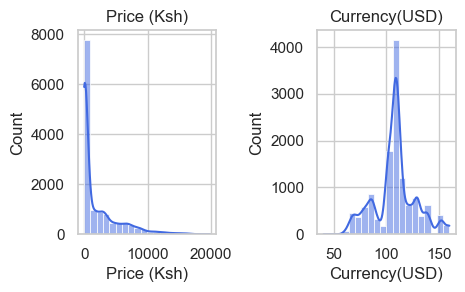

In [189]:
# Set the style of the plots
sns.set(style="whitegrid")

# Distribution of Numerical Features
numerical_features = ["Price (Ksh)", "Currency(USD)"]

plt.figure(figsize=(12, 8))

# Loop through the numerical features and plot
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    # Use a strong blue color for the histogram and KDE curve
    sns.histplot(data=df4[feature], bins=20, kde=True, color='royalblue')
    plt.title(feature)

# Adjust layout
plt.tight_layout()
plt.show()

#### **Observation**
The **Price (Ksh) distribution** is highly **right-skewed**, with most values concentrated at the lower end and a long tail extending towards higher prices, indicating **potential outliers** and a **non-normal distribution** that may require **log transformation** or **scaling** for analysis. In contrast, the **Currency (USD) distribution** appears more **bell-shaped** but slightly skewed, suggesting a **unimodal structure** with a strong central peak, where most exchange rates fluctuate within a specific range.

### Check for the Distribution of the Inflation Rate

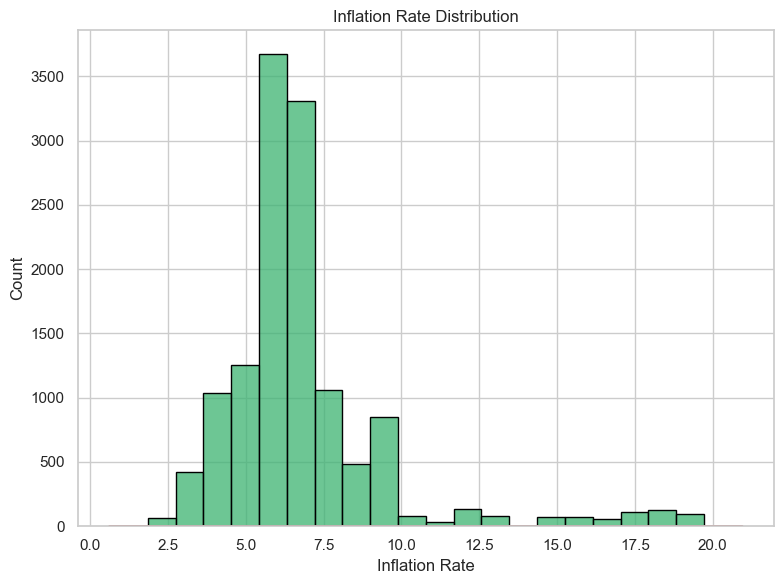

In [190]:

# Plot the histogram with a specific color for the bars
plt.figure(figsize=(8, 6))
sns.histplot(df4['Inflation Rate'], bins=20, kde=False, color='mediumseagreen', edgecolor='black')

# Plot the KDE curve with a different color
sns.kdeplot(df4['Inflation Rate'], color='darkred')

# Set the title and labels
plt.title("Inflation Rate Distribution")
plt.xlabel("Inflation Rate")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

#### Observation

  The inflation rate distribution is right-skewed, with the majority of values concentrated between 5% and 7.5%, indicating this as the most common range. Most rates fall between 2.5% and 10%, with a gradual decline in frequency as the inflation rate increases. Rare occurrences of inflation rates above 15% are visible, suggesting potential outliers. Overall, the distribution reflects a typical pattern where moderate inflation rates are more common, while higher rates are less frequent

#### Boxplots to show the Distribution of some Numerical Features

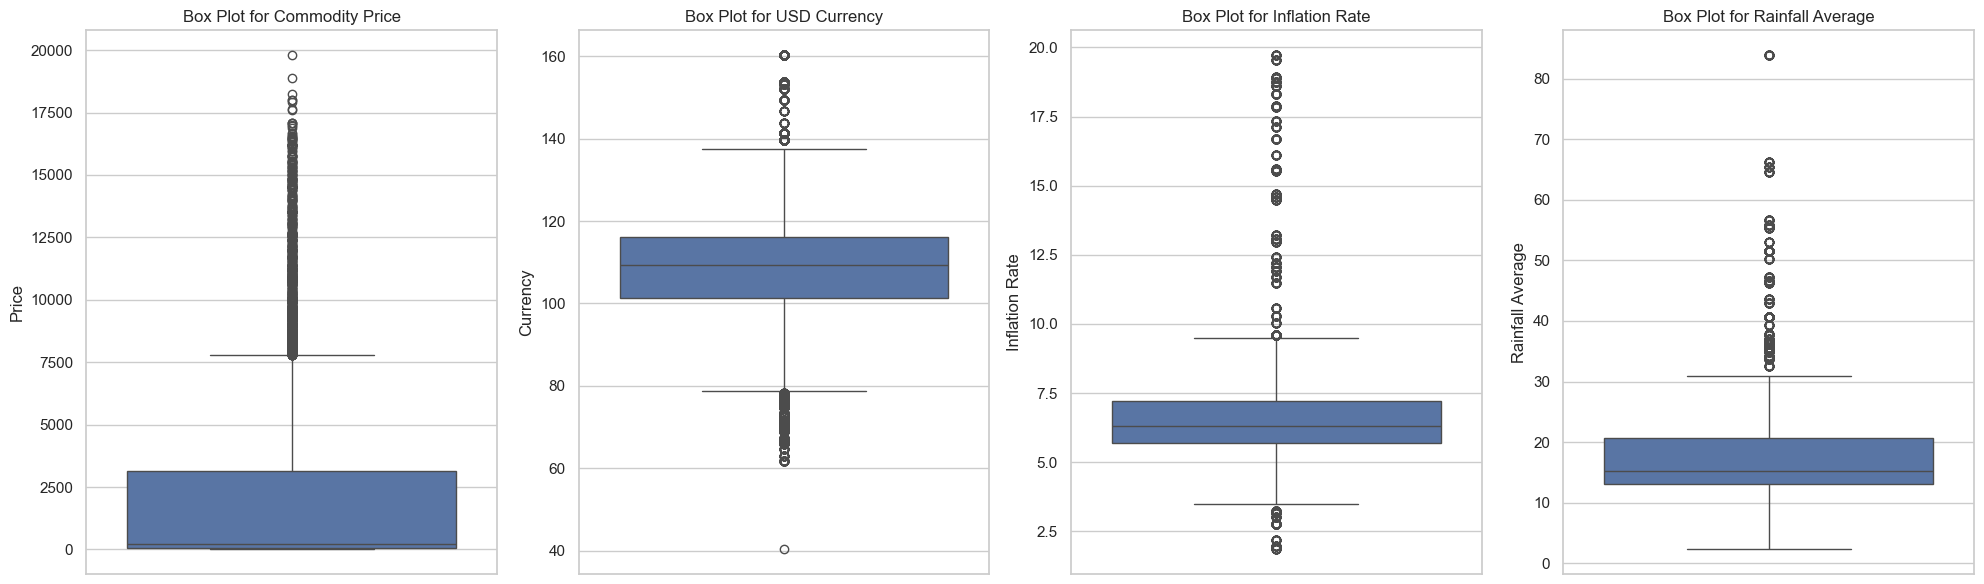

In [191]:
# Ensure there are no duplicate column names
df4 = df4.loc[:, ~df4.columns.duplicated()]

# Ensure 'Rainfall Average' is present
if 'Rainfall Average' not in df4.columns:
    print("Error: 'Rainfall Average' column not found!")
else:
    # Convert 'Rainfall Average' to numeric (handling errors)
    df4['Rainfall Average'] = pd.to_numeric(df4['Rainfall Average'], errors='coerce')

    # Set figure size
    fig, axes = plt.subplots(1, 4, figsize=(20, 6))  # Wider figure

    # Plot box plots for each variable
    sns.boxplot(y=df4['Price (Ksh)'], ax=axes[0])
    axes[0].set_ylabel('Price')
    axes[0].set_title('Box Plot for Commodity Price')

    sns.boxplot(y=df4['Currency(USD)'], ax=axes[1])
    axes[1].set_ylabel('Currency')
    axes[1].set_title('Box Plot for USD Currency')

    sns.boxplot(y=df4['Inflation Rate'], ax=axes[2])
    axes[2].set_ylabel('Inflation Rate')
    axes[2].set_title('Box Plot for Inflation Rate')

    sns.boxplot(y=df4['Rainfall Average'], ax=axes[3])
    axes[3].set_ylabel('Rainfall Average')
    axes[3].set_title('Box Plot for Rainfall Average')

    plt.tight_layout()
    plt.show()

#### **Observation**

*   The box plots reveal distinct patterns in the data. Commodity prices exhibit a wide range with numerous outliers above 10,000, indicating significant variability. USD currency values are relatively stable, with the interquartile range (IQR) centered around 100–120, though outliers exist both above 140 and below 60. Inflation rates are concentrated within 5–7.5%, but outliers above 10% suggest occasional high inflation periods. Rainfall averages are generally low, with the IQR between 10 and 20, yet frequent outliers above 50 reflect sporadic high rainfall events. These plots highlight the central tendency, variability, and presence of outliers in each dataset.

#### Distribution of categorical columns

Categorical Columns:


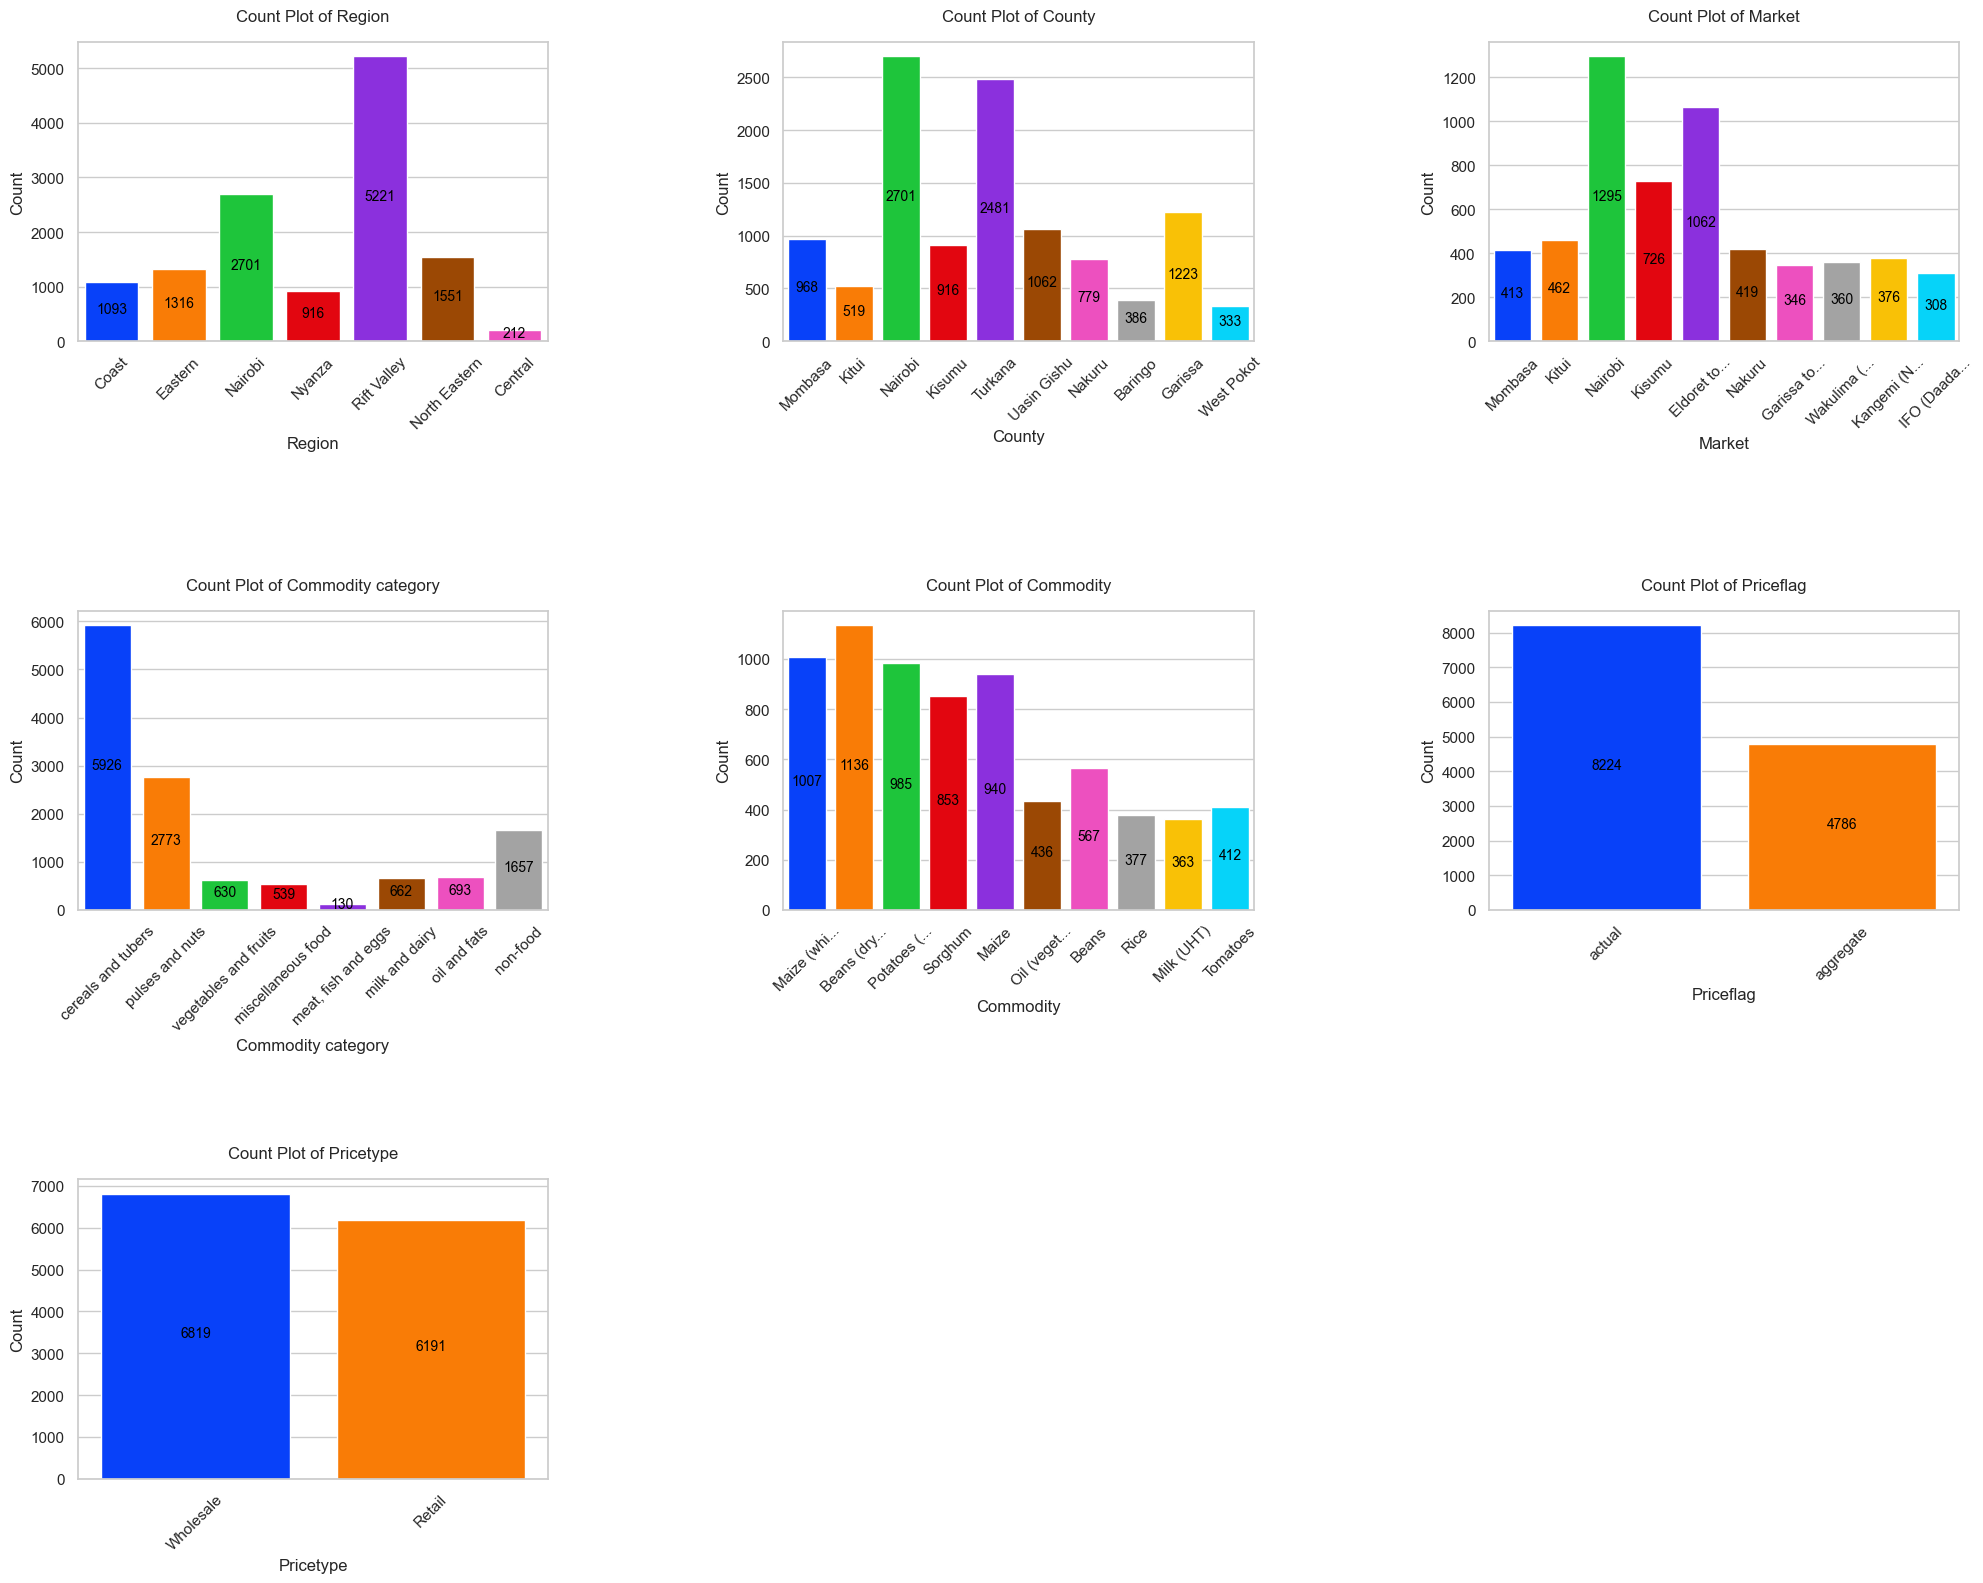

In [192]:
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Define the list of categorical columns to analyze
categorical_columns = ['Region', 'County', 'Market',
                       'Commodity Category', 'Commodity','Priceflag',
                       'Pricetype']

# Print only the categorical columns
print("Categorical Columns:")
for column in categorical_columns:
    if column in data.columns:  # Ensure the column exists in the DataFrame
        print(column)

# Filter the list of categorical columns to only include those available in the DataFrame
available_columns = [column for column in categorical_columns if column in df4.columns]

# Calculate the number of rows and columns based on the number of available categorical columns
num_columns = 3  # Adjust as needed
num_rows = (len(available_columns) // num_columns) + (len(available_columns) % num_columns > 0)

# Create subplots with an increased figure size for better readability
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(20, 16))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each available categorical column
for i, column in enumerate(available_columns):
    # Sample a subset of the column's values to avoid too many categories
    top_categories = df4[column].value_counts().head(10).index  # Get the top 10 most frequent categories
    sampled_df4 = df4[df4[column].isin(top_categories)]  # Filter data to only include the top categories

    # Plot the countplot for the sampled data
    # Pass the column values directly to the 'x' argument
    sns.countplot(x=sampled_df4[column], palette='bright', ax=axes[i], saturation=0.95)

    # Add labels to the bars and position them below each bar
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10, label_type='center', padding=2)

    # Set title and labels with capitalized column names
    axes[i].set_title(f'Count Plot of {column.capitalize()}', pad=15)
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

    # Ensure labels are directly under the bars and adjust for readability
    axes[i].tick_params(axis='x', rotation=45)

    # Set custom labels to avoid long labels causing overlap
    if column == 'Market':
        axes[i].set_xticklabels([label.get_text()[:10] + '...' if len(label.get_text()) > 10 else label.get_text()
                                 for label in axes[i].get_xticklabels()])
    elif column == 'Commodity Category':
        # Manually set the alignment of x-tick labels for Commodity Category
        axes[i].set_xticks(range(len(top_categories)))
        axes[i].set_xticklabels(top_categories, rotation=45, ha='center')
    elif column == 'Commodity':
        # Adjust long labels in the Commodity plot
        axes[i].set_xticklabels([label.get_text()[:10] + '...' if len(label.get_text()) > 10 else label.get_text()
                                 for label in axes[i].get_xticklabels()])

# Hide any unused subplots if the number of available columns is less than the grid size
for j in range(len(available_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and add more space between the plots
plt.tight_layout()
plt.subplots_adjust(hspace=0.9, wspace=0.5)  # Further increase spacing
plt.show()

#### Observation
*   Cereals and Tubers are the most sold Commodity Category with Dry Beans being the top selling Commodity (A person who intends to deal with food commodity business, may include beans as the key Commodity).



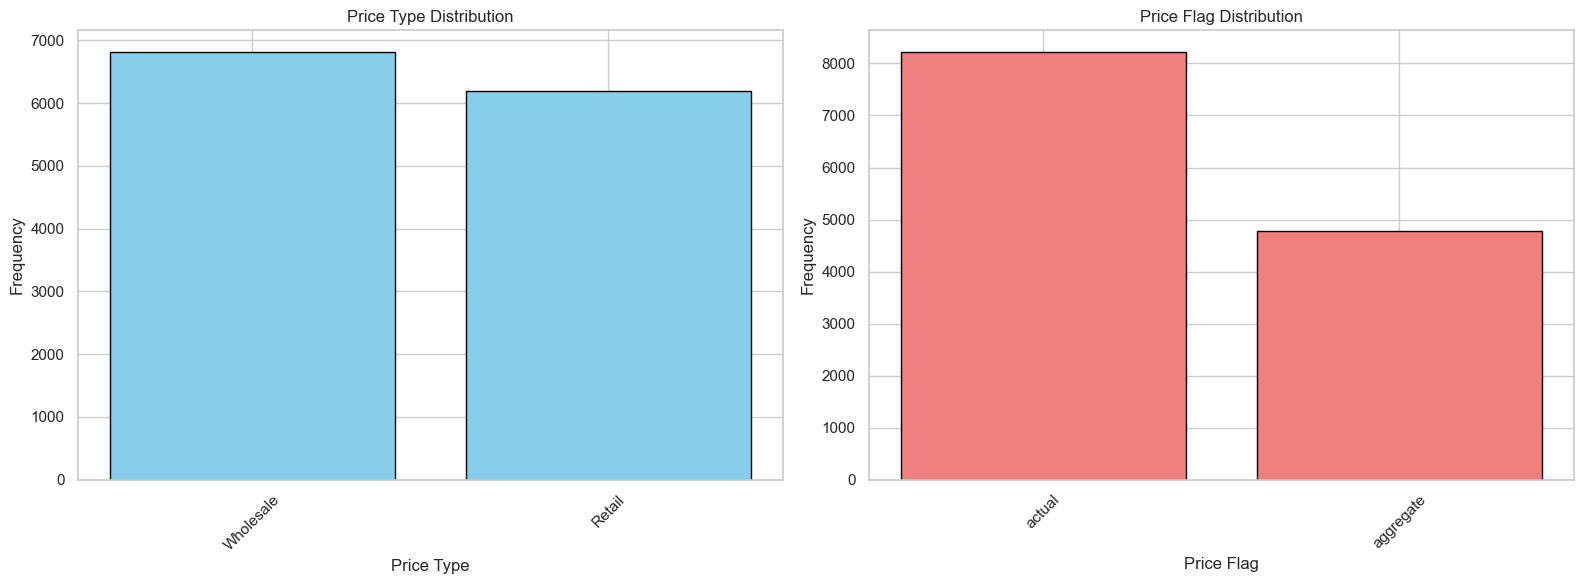

In [193]:
# Calculate and plot Price Type Distribution
price_type_counts = df4['Pricetype'].value_counts()
labels = price_type_counts.index
sizes = price_type_counts.values

plt.figure(figsize=(16, 6))  # Increase the figure size to accommodate both plots

# Plot the first bar graph for Price Type Distribution
plt.subplot(1, 2, 1)  # Create the first subplot
plt.bar(labels, sizes, color='skyblue', edgecolor='black')
plt.xlabel('Price Type')
plt.ylabel('Frequency')
plt.title('Price Type Distribution')
plt.xticks(rotation=45)

# Calculate and plot Price Flag Distribution
price_flag_counts = df4['Priceflag'].value_counts()
labels = price_flag_counts.index
sizes = price_flag_counts.values

# Plot the second bar graph for Price Flag Distribution
plt.subplot(1, 2, 2)  # Create the second subplot
plt.bar(labels, sizes, color='lightcoral', edgecolor='black')
plt.xlabel('Price Flag')
plt.ylabel('Frequency')
plt.title('Price Flag Distribution')
plt.xticks(rotation=45)

plt.tight_layout()  # Ensure that the plots do not overlap
plt.show()



#### Observation
*   The bar charts illustrate the distribution of price types and price flags within the dataset. The first chart shows a fairly balanced frequency between wholesale and retail price types, with wholesale slightly higher. The second chart highlights a dominance of actual price flags compared to aggregate flags, suggesting that the majority of data entries represent specific recorded prices rather than summarized or averaged data.

#### Plot a Line Graph for Inflation Rate

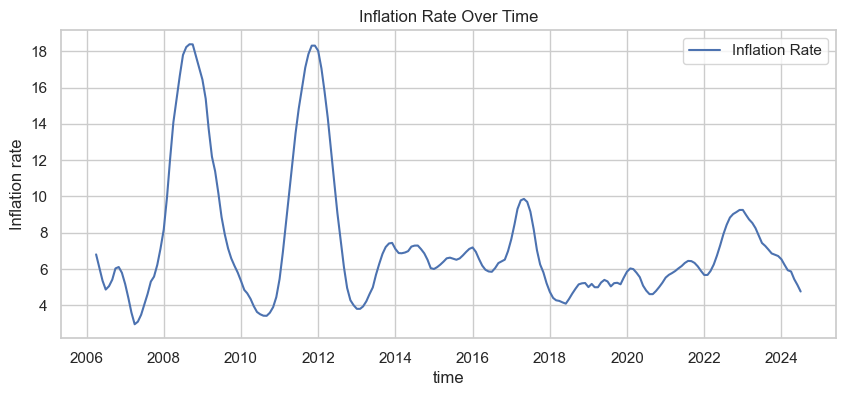

In [194]:
# Remove potential duplicates and smooth the data
df4 = df4.loc[~df4.index.duplicated(keep='first')]  # Remove duplicated time points
df4['Inflation Rate'] = df4['Inflation Rate'].rolling(window=6, center=True).mean()  # Smooth data with rolling window

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(df4.index, df4['Inflation Rate'], label='Inflation Rate')
plt.title("Inflation Rate Over Time")
plt.xlabel("time")
plt.ylabel("Inflation rate")
plt.legend()
plt.show()

### **Observation**


 
*  The plot illustrates inflation rate trends from 2006 to 2024, showing significant spikes above 18% between 2008 and 2012, likely due to economic instability or external shocks. From 2014 to 2018, inflation remained relatively stable with moderate fluctuations, followed by a flatter pattern between 2018 and 2020. Post-2020, a sharp rise in inflation occurred, possibly driven by global disruptions such as the COVID-19 pandemic, before declining notably after 2023, potentially due to monetary tightening or economic corrections. The graph highlights key periods of economic volatility and stabilization over nearly two decades.


#### Plot a Line Gragh for Rainfall Average over time

<module 'matplotlib.pyplot' from 'c:\\Users\\user\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

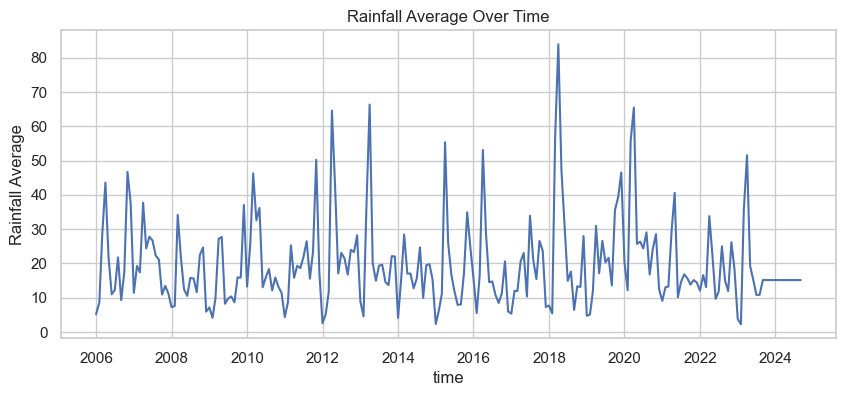

In [195]:
# Line plot for trends in Rainfall Average over time
plt.figure(figsize=(10, 4))
plt.plot(df4.index, df4['Rainfall Average'], label='Rainfall Average')
plt.title("Rainfall Average Over Time")
plt.xlabel("time")
plt.ylabel("Rainfall Average")
plt



The plot shows the average rainfall trends from 2006 to 2024, with highly variable patterns throughout the period.

#### **Observation**
*  There are significant spikes above 70 units in several years, notably around 2012, 2018, and 2020, indicating periods of heavy rainfall or extreme weather events. There are also frequent fluctuations between low and moderate rainfall levels, suggesting inconsistent weather patterns. After 2022, the rainfall appears more stable, with lower fluctuations. This graph highlights the variability in rainfall over the years, which may be influenced by changing climate conditions, seasonal factors, or regional weather anomalies.



#### Plot a Line Graph for Price (Ksh)

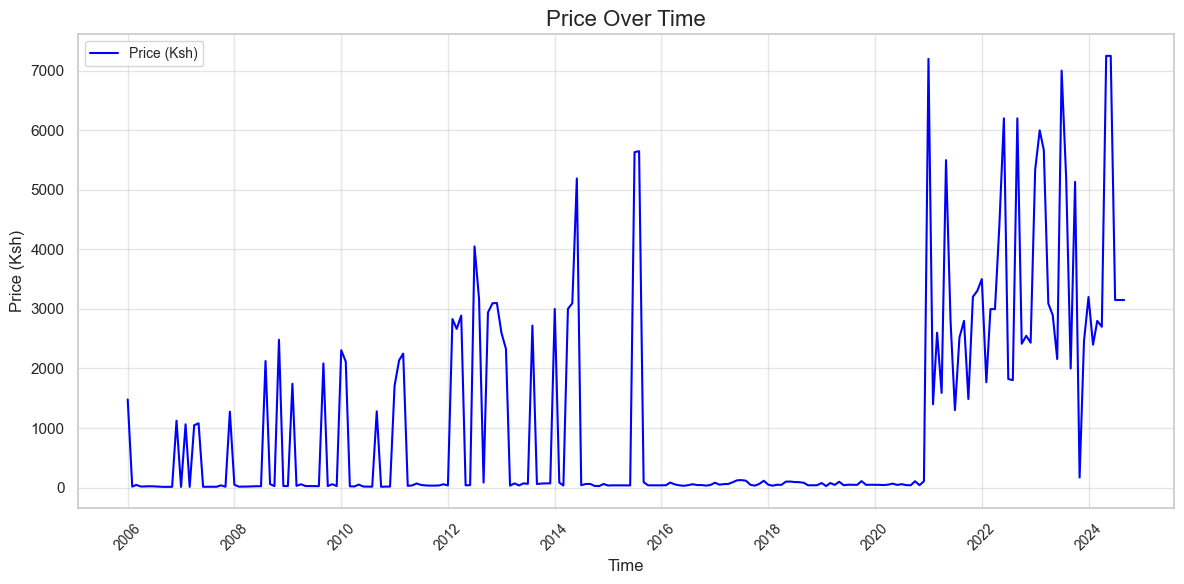

In [196]:
# Plot the original price data without smoothing
plt.figure(figsize=(12, 6))
plt.plot(df4.index, df4['Price (Ksh)'], label='Price (Ksh)', color='blue', linewidth=1.5)

# Add title, labels, grid, and legend
plt.title("Price Over Time", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Price (Ksh)", fontsize=12)
plt.grid(alpha=0.5)
plt.xticks(rotation=45, fontsize=10)
plt.legend(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


#### **Observation**
*   The graph illustrates price trends from 2006 to 2024, showing an initial period of stability with low fluctuations between 2006 and 2010. This is followed by increased volatility from 2010 to 2014, marked by sharp price spikes and dips, possibly due to market disruptions. Between 2015 and 2019, prices remained flat or showed minimal variation, indicating a period of relative stability or limited data. From 2020 onwards, prices surged significantly, accompanied by heightened volatility, reflecting potential market shifts or external influences like economic disruptions.





#### A Line graph for Currency in USD over time

<module 'matplotlib.pyplot' from 'c:\\Users\\user\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

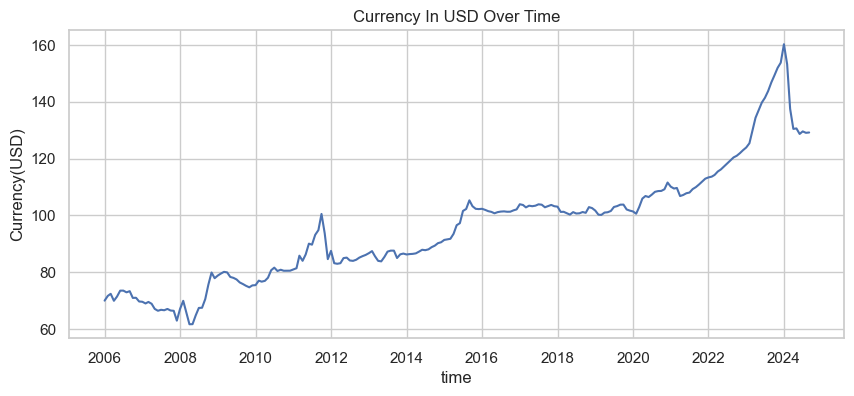

In [197]:
# Line plot for trends in Rainfall Average over time
plt.figure(figsize=(10, 4))
plt.plot(df4.index, df4['Currency(USD)'], label='Currency(USD)')
plt.title("Currency In USD Over Time")
plt.xlabel("time")
plt.ylabel("Currency(USD)")
plt

#### **Observation**

*   The graph shows the trend of the currency exchange rate (USD) over time, highlighting a general upward movement from 2006 to 2023, indicating local currency depreciation. Notable spikes occur around 2012, 2016, and a sharp surge between 2021 and 2023, likely due to economic shocks or inflationary pressures. After peaking above 160, the exchange rate experiences a sudden drop, possibly due to policy interventions or market corrections, before stabilizing in 2024. This trend suggests the influence of economic policies, inflation, and global financial conditions on currency fluctuations.

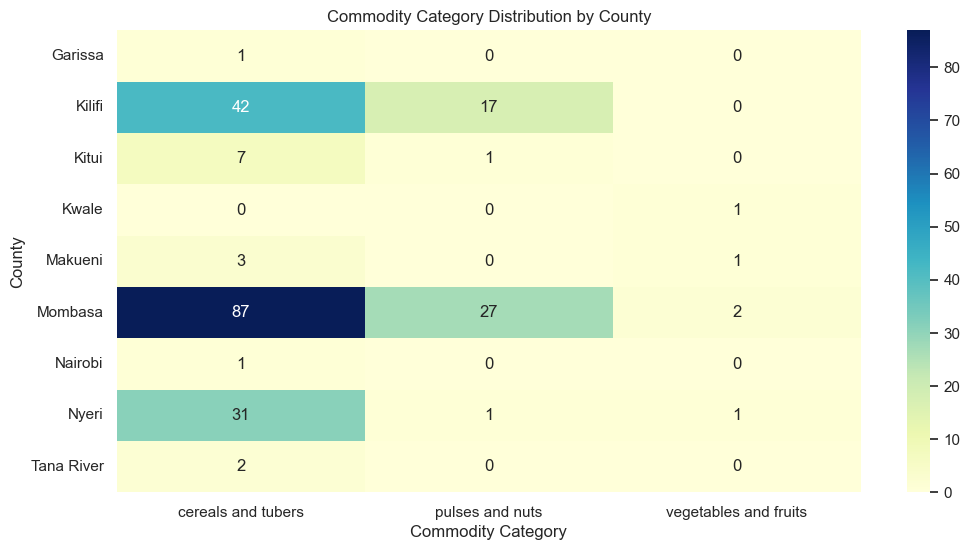

In [198]:
# Group the data by 'County' and 'Commodity Category' and count occurrences
category_by_county = df4.groupby(['County', 'Commodity Category']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(12, 6))
sns.heatmap(category_by_county, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.xlabel('Commodity Category')
plt.ylabel('County')
plt.title('Commodity Category Distribution by County')
plt.show()

#### **Observation**
*   The heatmap illustrates the distribution of three commodity categories—cereals and tubers, pulses and nuts, and vegetables and fruits—across various counties. Mombasa leads in "cereals and tubers" (87), while Kilifi shows notable contributions in both "cereals and tubers" (42) and "pulses and nuts" (17). Vegetables and fruits are sparsely distributed, with only a few occurrences in counties like Mombasa, Kwale, Makueni, and Nyeri. Some counties, such as Nairobi and Tana River, have minimal or no significant contributions across categories. The data highlights uneven commodity distribution and emphasizes the dominance of cereals and tubers in several counties.

#### Compare the mean prices of different product categories

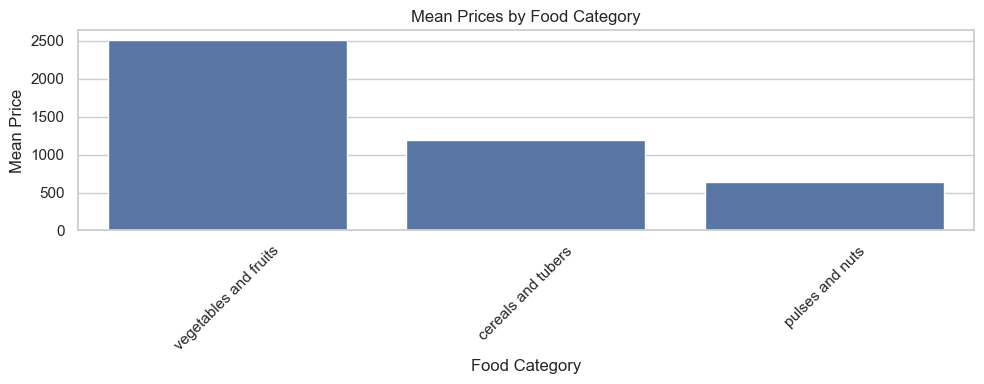

In [199]:
# Summary Statistics for Food Categories
category_summary = df4.groupby('Commodity Category')['Price (Ksh)'].agg(['mean', 'median', 'std', 'count']).reset_index()
category_summary = category_summary.sort_values(by='mean', ascending=False)

# Summary Statistics for Commodities
commodity_summary = df4.groupby('Commodity')['Price (Ksh)'].agg(['mean', 'median', 'std', 'count']).reset_index()
commodity_summary = commodity_summary.sort_values(by='mean', ascending=False)

# Plotting Mean Prices by Food Category
plt.figure(figsize=(10, 4))
sns.barplot(data=category_summary, x='Commodity Category', y='mean')
plt.xlabel('Food Category')
plt.ylabel('Mean Price')
plt.title('Mean Prices by Food Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Observation**


*   The visualization reveals that Vegetables and fruits had the highest mean prices, followed by Cereals and tubers, then Pulses and Nuts.

### Top 10 most Sold Commodities

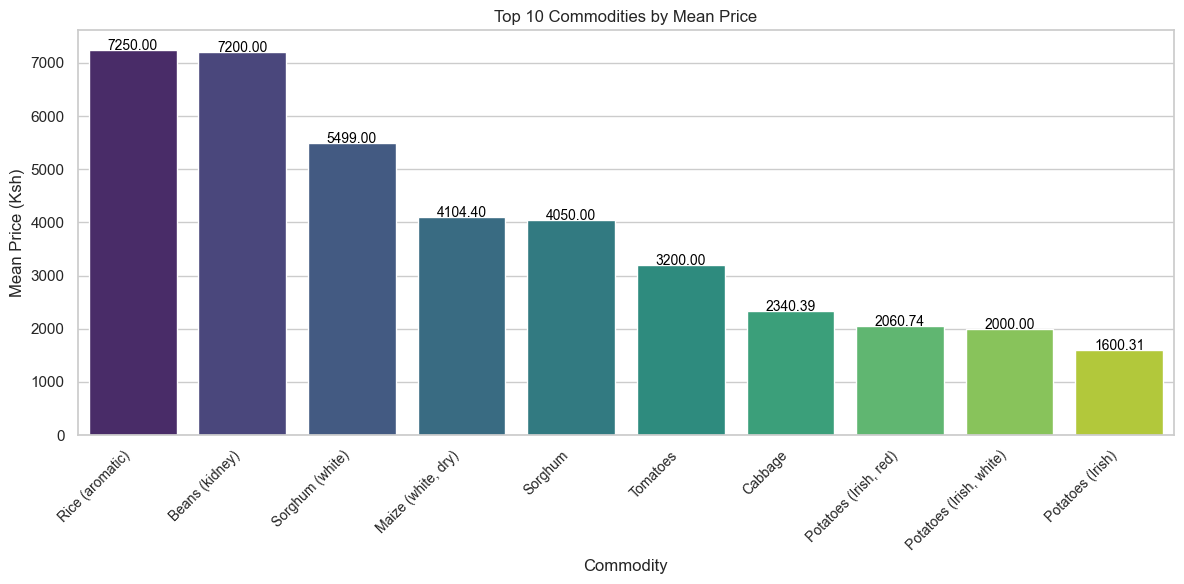

In [200]:
# Calculate mean price for each commodity and get top 10
commodity_mean_prices = df4.groupby('Commodity')['Price (Ksh)'].mean().reset_index()
top_10 = commodity_mean_prices.sort_values(by='Price (Ksh)', ascending=False).head(10)

# Create the vertical bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Commodity',
    y='Price (Ksh)',
    data=top_10,
    palette='viridis'
)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Set plot labels and title
plt.xlabel('Commodity')
plt.ylabel('Mean Price (Ksh)')
plt.title('Top 10 Commodities by Mean Price')

# Add value labels on top of each bar
for i, v in enumerate(top_10['Price (Ksh)']):
    plt.text(i, v + 0.5, f'{v:.2f}', ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

#### Observation
The bar chart presents the **top 10 commodities by mean price (Ksh)**, highlighting **Rice (aromatic)** as the most expensive at **7,250 Ksh**, followed closely by **Kidney Beans (7,200 Ksh)**. Other high-priced commodities include **White Sorghum (5,499 Ksh)** and **White Dry Maize (4,104.40 Ksh)**. Notably, **Tomatoes (3,200 Ksh)** and **Cabbage (2,340.39 Ksh)** fall within the mid-price range, while **Irish Potatoes (Red, White, and General)** are among the least expensive, with **Irish Potatoes** being the lowest at **1,600.31 Ksh**. This price distribution suggests that staple grains like **rice, beans, and maize** have higher average prices, possibly due to **demand, production costs, or import dependencies**, while vegetables and potatoes remain more affordable, likely reflecting **local production efficiency and supply stability**.

### Check for the Outliers

In [201]:
# Select only numeric columns
numeric_columns = df4.select_dtypes(include=['float64', 'int64']).columns

# Calculate Q1 and Q3 for each numerical column
Q1 = df4[numeric_columns].quantile(0.25)
Q3 = df4[numeric_columns].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Display the results
print("Q1:\n", Q1)
print("Q3:\n", Q3)
print("IQR:\n", IQR)


Q1:
 Currency(USD)       80.523900
Price (Ksh)         35.630000
Inflation Rate       5.215000
Rainfall Average    11.879367
Name: 0.25, dtype: float64
Q3:
 Currency(USD)        103.888900
Price (Ksh)         2137.000000
Inflation Rate         7.850000
Rainfall Average      24.662667
Name: 0.75, dtype: float64
IQR:
 Currency(USD)         23.3650
Price (Ksh)         2101.3700
Inflation Rate         2.6350
Rainfall Average      12.7833
dtype: float64


#### Observation
The outlier detection results using the IQR method indicate significant variability in **commodity prices, currency exchange rates, inflation, and rainfall patterns**. Currency values outside **$45.47 to $138.94** suggest extreme exchange rate fluctuations, potentially impacting market stability. Commodity prices exhibit high volatility, with values above **Ksh 4,288.37** considered outliers, likely due to **scarcity, inflation, or seasonal effects**. Inflation rates exceeding **11.80%** highlight periods of **economic instability**, while rainfall values above **43.45 mm** suggest unusually high precipitation, potentially influencing **agricultural productivity and market supply**. These findings emphasize the need to monitor **economic and environmental factors** when analyzing price trends.

### Handle the Outliers by Capping.

In [202]:
# Define the columns to cap outliers
columns_to_cap = ["Currency(USD)", "Price (Ksh)", "Inflation Rate", "Rainfall Average"]

# Compute IQR, lower bound, and upper bound for each column
for col in columns_to_cap:
    Q1 = df4[col].quantile(0.25)
    Q3 = df4[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply capping
    df4[col] = df4[col].clip(lower=lower_bound, upper=upper_bound)


#### Plot the Boxplots again after Capping the Outliers

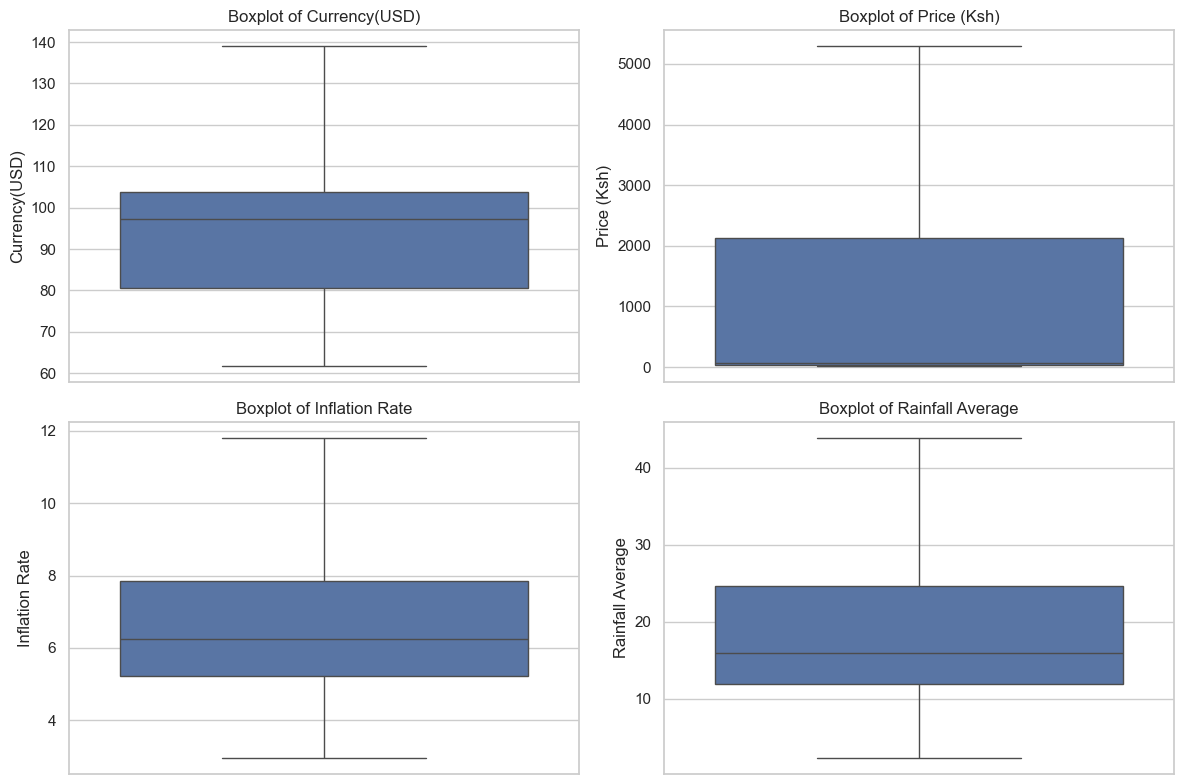

In [203]:
# Define columns to plot
columns_to_plot = ["Currency(USD)", "Price (Ksh)", "Inflation Rate", "Rainfall Average"]

# Set up the figure size
plt.figure(figsize=(12, 8))

# Create box plots for each column
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df4[col])
    plt.title(f"Boxplot of {col}")

# Display the plots
plt.tight_layout()
plt.show()

#### Observation
The boxplots show the distribution of **Currency (USD), Price (Ksh), Inflation Rate, and Rainfall Average** after handling outliers through **capping**. The whiskers now extend to the capped limits, reducing extreme variations and making the data more **normally distributed**. The **Currency (USD)** and **Price (Ksh)** boxplots indicate a narrower range, suggesting a **more stable exchange rate and commodity pricing**. Inflation appears more **consistent**, with fewer extreme values affecting economic trends. Rainfall distribution is now more compact, ensuring **better agricultural forecasting**. Capping has effectively reduced the influence of outliers, allowing for more reliable analysis and model predictions.

#### A heatmap for the Numerical Columns

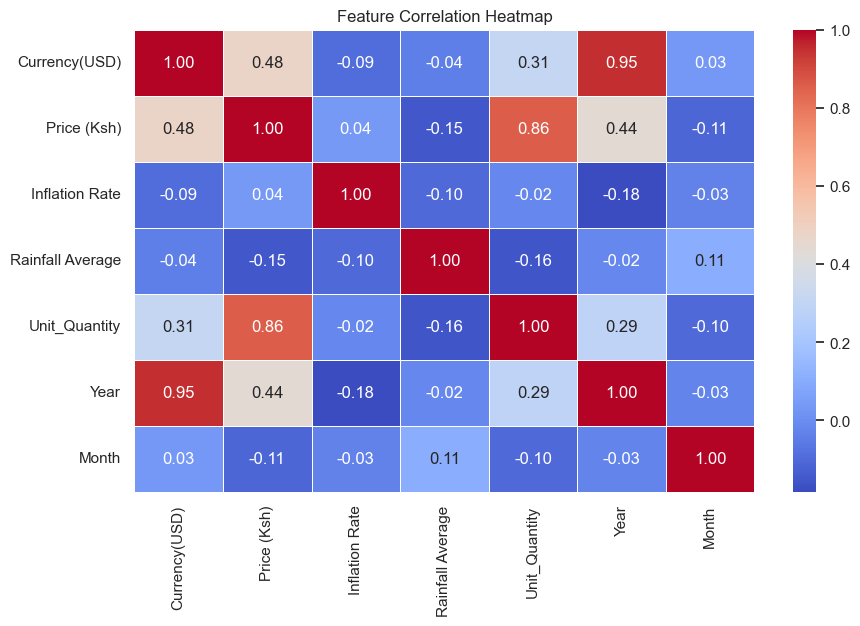

In [204]:
# Select only numeric columns
numeric_df = df4.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


#### Observation
From the visualization, it can be viewed that the most positive value is 0.86, meaning
Unit Quantity is associated with Price (Ksh). There is also a reasonable positive relation from the
exchange rate depicted by Currency (USD) of 0.48, meaning fluctuations in currency may influence
price change.It can be inferred that overall, Unit Quantity and Currency (USD) are the most influential features on Price. 


#### Handling Categorical Columns

In [205]:
# Identify categorical columns
categorical_cols = df4.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index(['Region', 'County', 'Market', 'Commodity Category', 'Commodity',
       'Priceflag', 'Pricetype', 'Day Name', 'Day_Classification'],
      dtype='object')


Apply One hot Encoding to handle the categorica; columns

In [206]:
# Define categorical columns
categorical_cols = ['Region', 'County', 'Market', 'Commodity Category', 'Commodity',
                    'Priceflag', 'Pricetype', 'Day Name', 'Day_Classification']

# Apply One-Hot Encoding
df4_encoded = pd.get_dummies(df4, columns=categorical_cols, drop_first=True)

# Display the first few rows
df4_encoded.head()


,Date,Currency(USD),Price (Ksh),Inflation Rate,Rainfall Average,Unit_Quantity,Year,Month,Region_Coast,Region_Eastern,...,Commodity_Tomatoes,Priceflag_aggregate,Pricetype_Wholesale,Day Name_Monday,Day Name_Saturday,Day Name_Sunday,Day Name_Thursday,Day Name_Tuesday,Day Name_Wednesday,Day_Classification_weekend
time,,,,,,,,,,,,,,,,,,,,,
2006-01-01,2006-01-15,69.9878,1480.00,NaN,5.236400,90,2006,1,True,False,...,False,False,True,False,False,True,False,False,False,True
2006-02-01,2006-02-15,71.6544,16.41,NaN,8.557433,1,2006,2,True,False,...,False,False,True,False,False,False,False,False,True,False
2006-03-01,2006-03-15,72.3856,44.69,NaN,28.083067,1,2006,3,True,False,...,False,False,True,False,False,False,False,False,True,False
2006-04-01,2006-04-15,69.9333,17.17,6.803333,43.596300,1,2006,4,True,False,...,False,False,True,False,True,False,False,False,False,True
2006-05-01,2006-05-15,71.4111,19.12,6.098333,21.993333,1,2006,5,True,False,...,False,False,True,True,False,False,False,False,False,False


In [207]:
# Select only numeric columns
numeric = df4.select_dtypes(include=['float64', 'int64']).columns

# Print the numeric columns
print("Numerical Columns:", numeric)


Numerical Columns: Index(['Currency(USD)', 'Price (Ksh)', 'Inflation Rate', 'Rainfall Average'], dtype='object')


In [208]:
from sklearn.preprocessing import StandardScaler

# Define the numerical columns
numerical_cols = ['Currency(USD)', 'Price (Ksh)', 'Inflation Rate', 'Rainfall Average']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling
df4_encoded[numerical_cols] = scaler.fit_transform(df4_encoded[numerical_cols])

# Check the scaled data
df4_encoded.head()


,Date,Currency(USD),Price (Ksh),Inflation Rate,Rainfall Average,Unit_Quantity,Year,Month,Region_Coast,Region_Eastern,...,Commodity_Tomatoes,Priceflag_aggregate,Pricetype_Wholesale,Day Name_Monday,Day Name_Saturday,Day Name_Sunday,Day Name_Thursday,Day Name_Tuesday,Day Name_Wednesday,Day_Classification_weekend
time,,,,,,,,,,,,,,,,,,,,,
2006-01-01,2006-01-15,-1.335241,0.266720,NaN,-1.321680,90,2006,1,True,False,...,False,False,True,False,False,True,False,False,False,True
2006-02-01,2006-02-15,-1.247353,-0.652193,NaN,-1.005242,1,2006,2,True,False,...,False,False,True,False,False,False,False,False,True,False
2006-03-01,2006-03-15,-1.208794,-0.634438,NaN,0.855218,1,2006,3,True,False,...,False,False,True,False,False,False,False,False,True,False
2006-04-01,2006-04-15,-1.338115,-0.651716,-0.031000,2.333365,1,2006,4,True,False,...,False,False,True,False,True,False,False,False,False,True
2006-05-01,2006-05-15,-1.260184,-0.650492,-0.326705,0.274970,1,2006,5,True,False,...,False,False,True,True,False,False,False,False,False,False


Ensure that the Inflation Rate column is of the correct data type

In [209]:
df4_encoded['Inflation Rate'].fillna(df4_encoded['Inflation Rate'].mean(), inplace=True)



### Machine learning

List all the Regression Models to be tesed.

In [210]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Support Vector Regression (SVR)": SVR(kernel='rbf', C=100, epsilon=0.1),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "XGBoost Regressor": xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

# Initialize result dictionary
results = {}



These regression models are to be tested and evaluated based on various performance metrics, from which the best-performing model will be selected for deployment and further analysis.

##### Identify and Remove the target Variable

In [211]:
# Split the data into features (X) and target (y)
X = df4_encoded.drop(columns=['Price (Ksh)'])
y = df4_encoded['Price (Ksh)']

#### Split the Dataset int Training and Test Dataset

In [212]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [213]:
print(X_train.dtypes)


Date                                        datetime64[ns]
Currency(USD)                                      float64
Inflation Rate                                     float64
Rainfall Average                                   float64
Unit_Quantity                                        int32
Year                                                 int32
Month                                                int32
Region_Coast                                          bool
Region_Eastern                                        bool
Region_Nairobi                                        bool
Region_North Eastern                                  bool
County_Kilifi                                         bool
County_Kitui                                          bool
County_Kwale                                          bool
County_Makueni                                        bool
County_Mombasa                                        bool
County_Nairobi                                        bo

In [214]:
print(y_train.dtypes)

float64


In [215]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)


In [216]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')


### **Evaluation Metrics**

In regression modeling, evaluation metrics are essential for assessing the performance of predictive models. These metrics provide insights into the accuracy, error magnitude, and overall reliability of the predictions. The following section outlines six key evaluation metrics with their corresponding mathematical formulations and explanations.

#### 1. Mean Absolute Percentage Error (MAPE)
$$
MAPE = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100
$$`
Where:
- $n$ = total number of observations
- $y_i$ = actual value of the target variable
- $\hat{y}_i$ = predicted value

MAPE measures the average percentage error between actual and predicted values, making it useful for economic and financial analysis. However, it can be problematic when actual values are near zero.

#### 2. Symmetric Mean Absolute Percentage Error (SMAPE)
$$
SMAPE = \frac{1}{n} \sum_{i=1}^{n} \frac{|y_i - \hat{y}_i|}{(|y_i| + |\hat{y}_i|)/2} \times 100
$$
Where:
- $n$ = total number of observations
- $y_i$ = actual value of the target variable
- $\hat{y}_i$ = predicted value

SMAPE ensures symmetry in the error calculation, making it more reliable for datasets with varying numerical ranges.

#### 3. Mean Squared Error (MSE)
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
Where:
- $n$ = total number of observations
- $y_i$ = actual value of the target variable
- $\hat{y}_i$ = predicted value

MSE penalizes large errors more than small ones, making it sensitive to outliers.

#### 4. Root Mean Squared Error (RMSE)
$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$
Where:
- $n$ = total number of observations
- $y_i$ = actual value of the target variable
- $\hat{y}_i$ = predicted value

RMSE represents error magnitude in the same unit as the target variable, making it interpretable for real-world applications.

#### 5. Mean Absolute Error (MAE)
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$
Where:
- $n$ = total number of observations
- $y_i$ = actual value of the target variable
- $\hat{y}_i$ = predicted value

MAE is a robust measure of prediction error that is less sensitive to outliers than MSE.

#### 6. R-squared (R²) Score
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$
Where:
- $n$ = total number of observations
- $y_i$ = actual value of the target variable
- $\hat{y}_i$ = predicted value
- $\bar{y}$ = mean of actual values

R² measures the proportion of variance in the target variable that the model explains, ranging from 0 to 1.


In [217]:
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Correct MAPE calculation
    smape = np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred))) * 100  # SMAPE formula
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Store results
    results[model_name] = {
        "MAPE": mape,
        "SMAPE": smape,  # Added SMAPE
        "R^2": r2,
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse
    }



c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.60837e-38): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [218]:
# Convert results to a DataFrame for easy viewing
results_df4 = pd.DataFrame(results).T
print(results_df4.to_string())

                                       MAPE       SMAPE       R^2       MSE       MAE      RMSE
Linear Regression                502.946749  142.414666  0.076288  1.264753  0.904874  1.124613
Ridge Regression                 399.893435   32.897855  0.839669  0.219526  0.298701  0.468536
Lasso Regression                 545.955332   45.584308  0.717161  0.387265  0.409283  0.622306
Support Vector Regression (SVR)  366.392146   98.100414  0.001951  1.366536  0.775873  1.168989
Decision Tree Regression          19.309514   23.165660  0.813909  0.254797  0.199133  0.504775
Random Forest Regression         162.374735   22.244615  0.853625  0.200418  0.218368  0.447681
Gradient Boosting Regressor       11.300714   11.915126  0.929974  0.095881  0.131562  0.309646
XGBoost Regressor                 64.593804   18.124562  0.911713  0.120884  0.158414  0.347683


#### **Observation**
 The evaluation of regression models shows that Gradient Boosting Regressor (GBR) and XGBoost Regressor outperform all other models in terms of accuracy and predictive power. GBR achieves the lowest MAPE (11.30) and SMAPE (11.91), along with the highest R² (0.9299), indicating that it explains nearly 93% of the variance in the target variable. XGBoost also performs exceptionally well, with R² (0.9117) and low errors, making it the second-best model. In contrast, simpler models like Linear Regression and Support Vector Regression (SVR) perform poorly, showing high errors and minimal predictive capability. Decision Tree and Random Forest models provide decent results but are outperformed by boosting techniques. Ridge Regression performs better than Lasso, but both are still less effective compared to the ensemble-based models.

#### Plotting a visualization for the results

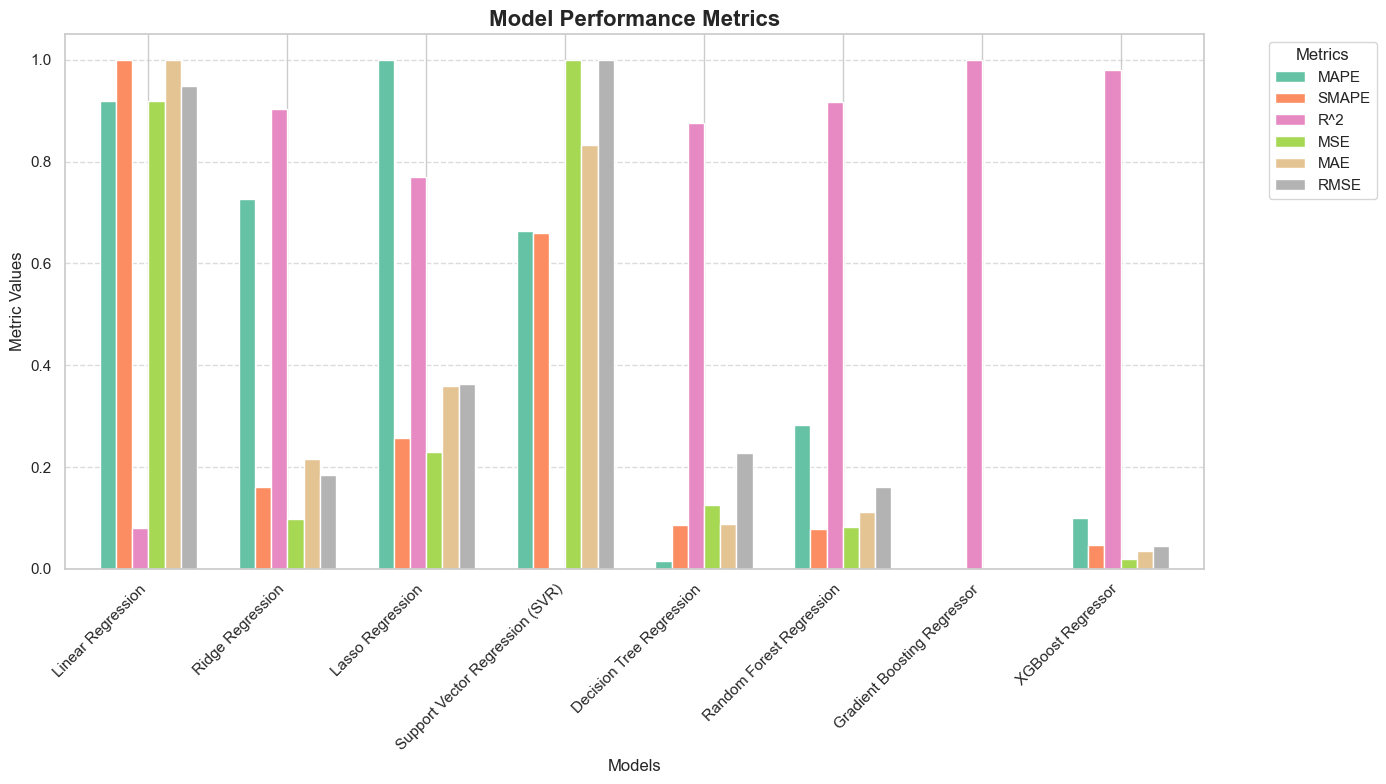

In [219]:
# Normalize the metrics to make them comparable
normalized_results = results_df4.copy()
for column in normalized_results.columns:
    normalized_results[column] = (normalized_results[column] - normalized_results[column].min()) / (
        normalized_results[column].max() - normalized_results[column].min()
    )

# Plot the metrics with normalization
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
normalized_results.plot(kind="bar", ax=ax, colormap="Set2", width=0.7)

# Add titles and labels
ax.set_title("Model Performance Metrics", fontsize=16, weight='bold')
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Metric Values", fontsize=12)
ax.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc="upper left")
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Rotate x-tick labels
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


### Analysis:
Gradient Boosting Regressor has the best performance based on R² and RMSE. Its R² value is the highest (0.930), indicating it explains the most variance in the target variable.
Random Forest and XGBoost also perform well, with Random Forest having a slightly better R² (0.854) and XGBoost performing well on MSE and MAE.
Decision Tree Regression is also a solid performer with a R² of 0.814, but its MAPE is much lower, indicating it’s less accurate compared to others.
SVR and Linear Regression are not performing as well. Their MAPE values are quite high, meaning they are not accurate enough for the target variable.

#### **Gradient Boosting - XGBoost (Ensemble Model)**

In [220]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

# Define SMAPE function (more stable than MAPE)
def smape(y_true, y_pred):
    return np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100

# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------------


#### Step 1: Hyperparameter Tuning

In [221]:
# XGBoost Hyperparameter Grid
xgb_params = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "max_depth": [3, 5, 7, 9],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

#  Gradient Boosting Hyperparameter Grid
gb_params = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "max_depth": [3, 5, 7, 9],
    "subsample": [0.6, 0.8, 1.0]
}

# Tune XGBoost
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_search = RandomizedSearchCV(
    xgb_model, xgb_params, scoring="neg_mean_absolute_error", n_iter=20, cv=5, n_jobs=-1, verbose=1, random_state=42
)
xgb_search.fit(X_train_scaled, y_train)

# Tune Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_search = RandomizedSearchCV(
    gb_model, gb_params, scoring="neg_mean_absolute_error", n_iter=20, cv=5, n_jobs=-1, verbose=1, random_state=42
)
gb_search.fit(X_train_scaled, y_train)

# Best Models
best_xgb = xgb_search.best_estimator_
best_gb = gb_search.best_estimator_

print(f"Best XGBoost Params: {xgb_search.best_params_}")
print(f"Best Gradient Boosting Params: {gb_search.best_params_}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best XGBoost Params: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best Gradient Boosting Params: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.05}


#### Step 2: Ensemble Model

In [222]:
# Predict
xgb_pred = best_xgb.predict(X_test_scaled)
gb_pred = best_gb.predict(X_test_scaled)

# Ensemble: Weighted Averaging (Adjust Weights if Needed)
ensemble_pred = (0.5 * xgb_pred) + (0.5 * gb_pred)


#### Step 3: Evaluation Metrics


In [223]:
# Ensure stable MAPE calculation
y_test_nonzero = np.where(y_test == 0, np.mean(y_test), y_test)
mape = np.mean(np.abs((y_test - ensemble_pred) / y_test_nonzero)) * 100
smape_score = smape(y_test, ensemble_pred)

mse = mean_squared_error(y_test, ensemble_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, ensemble_pred)
r2 = r2_score(y_test, ensemble_pred)

print("\n📊 Ensemble Model Metrics:")
print(f"🔹 MAPE: {mape:.2f}%")
print(f"🔹 SMAPE: {smape_score:.2f}%")
print(f"🔹 R²: {r2:.4f}")
print(f"🔹 MSE: {mse:.4f}")
print(f"🔹 RMSE: {rmse:.4f}")
print(f"🔹 MAE: {mae:.4f}")



📊 Ensemble Model Metrics:
🔹 MAPE: 31.90%
🔹 SMAPE: 16.28%
🔹 R²: 0.9200
🔹 MSE: 0.1096
🔹 RMSE: 0.3310
🔹 MAE: 0.1393


#### Observation
The ensemble model, combining **XGBoost and Gradient Boosting Regressor**, demonstrates strong predictive performance based on the reported metrics. The **R² score of 0.92** indicates that the model explains **92% of the variance** in the target variable, suggesting a high level of accuracy. The **Mean Absolute Percentage Error (MAPE) of 31.90%** and **Symmetric Mean Absolute Percentage Error (SMAPE) of 16.28%** show a moderate level of relative error, with SMAPE indicating a **balanced measure of accuracy**. The **Mean Squared Error (MSE) of 0.1096** and **Root Mean Squared Error (RMSE) of 0.3310** confirm that prediction errors are relatively small, while the **Mean Absolute Error (MAE) of 0.1393** reflects the average magnitude of these errors. Overall, these results suggest that the ensemble model generalizes well and is a **reliable choice for forecasting price fluctuations** while mitigating overfitting.

#### Step 4: Feature Importances

In [224]:
# Get feature importance from both models
xgb_importance = best_xgb.feature_importances_
gb_importance = best_gb.feature_importances_

# Average feature importances
ensemble_importance = (xgb_importance + gb_importance) / 2

# Create DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,  # Ensure X has column names
    "XGBoost Importance": xgb_importance,
    "Gradient Boosting Importance": gb_importance,
    "Ensemble Importance": ensemble_importance
}).sort_values(by="Ensemble Importance", ascending=False)

print("\n📢 Feature Importance from Ensemble Model:")
print(feature_importance_df.to_string())



📢 Feature Importance from Ensemble Model:
                                     Feature  XGBoost Importance  Gradient Boosting Importance  Ensemble Importance
4                              Unit_Quantity        2.318762e-01                  7.858655e-01         5.088709e-01
44                       Pricetype_Wholesale        3.529758e-01                  4.124275e-06         1.764899e-01
37           Commodity_Potatoes (Irish, red)        1.433831e-01                  3.729936e-05         7.171020e-02
5                                       Year        7.073357e-02                  1.259008e-02         4.166183e-02
35              Commodity_Maize (white, dry)        6.591645e-03                  6.097637e-02         3.378401e-02
2                             Inflation Rate        2.090736e-03                  4.809731e-02         2.509402e-02
34                   Commodity_Maize (white)        4.346207e-02                  1.774780e-04         2.181977e-02
28        Commodity Category_

### Plot the Selected Important Features 

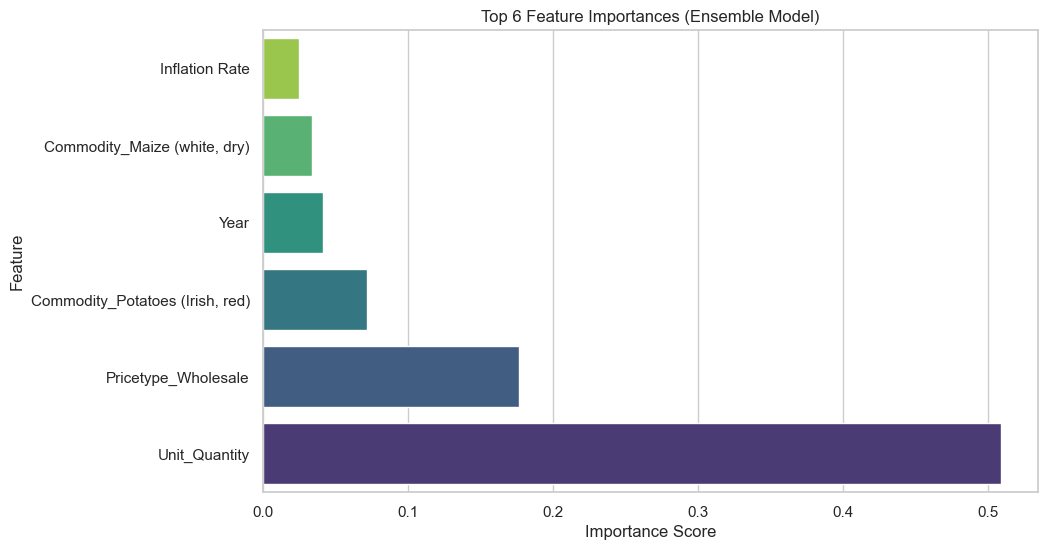

In [225]:
# Sort features by ensemble importance
top_features = feature_importance_df.nlargest(6, "Ensemble Importance")

# 🎨 Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_features["Ensemble Importance"],
    y=top_features["Feature"],
    palette="viridis"
)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 6 Feature Importances (Ensemble Model)")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


#### Observation
The plot shows the distribution of features according to
their effect on the food price prediction in kenya with Unit Quantity and Pricetype in wholesale leading
with high scores. The result can help different stakeholders in knowing the quantity to purchase and
with which pricetype.

#### Save the Model for Use

In [227]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
import pickle

# Example: Defining the models to be ensembled
xgboost_model = xgb.XGBRegressor(subsample=1.0, n_estimators=50, max_depth=5, learning_rate=0.03, colsample_bytree=0.7)
gradient_boosting_model = GradientBoostingRegressor(subsample=0.8, n_estimators=100, learning_rate=0.03, max_depth=3)

# Fit the models individually (Assume X_train and y_train are available)
xgboost_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

# Combine the models in a Voting Regressor
combined_model = VotingRegressor(estimators=[('xgb', xgboost_model), ('gbr', gradient_boosting_model)])

# Train the combined model
combined_model.fit(X_train, y_train)

# Save the trained ensemble model
with open("ensemble_model.pkl", "wb") as file:
    pickle.dump(combined_model, file)

print("Ensemble model saved as 'ensemble_model.pkl'")




Ensemble model saved as 'ensemble_model.pkl'


#### The ensemble model has been saved as a **Pickle (.pkl) file** named **`ensemble_model.pkl`**. This means that the trained model, which combines **XGBoost and Gradient Boosting Regressor**, has been serialized and stored in a binary format. **Pickle files** allow the model to be easily loaded later without the need for retraining, making it efficient for deployment or further analysis.